# Sales Analysis

***Import necessary libraries***

In [182]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#### Merging 12 months of sales data into a single file

In [183]:
list_csv_files = ['Sales_Data/Sales_January_2019.csv', 'Sales_Data/Sales_February_2019.csv', 'Sales_Data/Sales_March_2019.csv', 'Sales_Data/Sales_April_2019.csv', 'Sales_Data/Sales_June_2019.csv',
                  'Sales_Data/Sales_July_2019.csv', 'Sales_Data/Sales_August_2019.csv', 'Sales_Data/Sales_September_2019.csv', 'Sales_Data/Sales_October_2019.csv',
                 'Sales_Data/Sales_November_2019.csv', 'Sales_Data/Sales_December_2019.csv']

list_df = []

for filename in list_csv_files:
    list_df.append(pd.read_csv(filename))

merged_df = pd.concat(list_df)

merged_df.to_csv('all_data.csv', index = False)
    

#### Reading the 'all_data.csv' file to a variable for further processing

In [184]:
all_data = pd.read_csv('all_data.csv')
all_data.head(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


## Data cleaning and Data exploration

***Drop rows of NaN***

In [185]:
nan_df = all_data[all_data.isna().any(axis=1)] # It will show you rows that contain NaN values 
nan_df

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


***Find 'Or' and delete it***

In [186]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Adding a Month column

In [187]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


***Q1 What was the best month for sale and how much was earned that month?***

In [188]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [189]:
all_data = all_data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Purchase Address', 'Month']]

In [190]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...,...
170210,319666,Lightning Charging Cable,1,14.95,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
170211,319667,AA Batteries (4-pack),2,3.84,7.68,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
170212,319668,Vareebadd Phone,1,400.00,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
170213,319669,Wired Headphones,1,11.99,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


In [191]:
results = all_data.groupby('Month').sum()['Sales']
results

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     1.055929e+04
6     2.575265e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales in USD (million)')

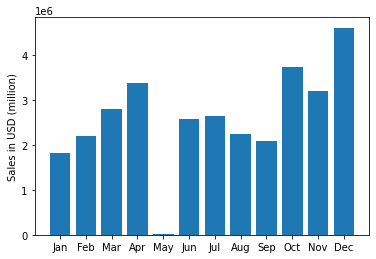

In [192]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, results)
plt.ylabel('Sales in USD (million)')

***Q2 which city had the highest number of sales?***

In [193]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split()[0]
all_data['City&State'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City&State
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland (OR)
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin (TX)


In [194]:
result_Q2 = all_data.groupby('City&State').sum()
result_Q2

,Quantity Ordered,Price Each,Sales,Month
City&State,,,,
Atlanta (GA),15096,2.541933e+06,2.556236e+06,98136
Austin (TX),10191,1.649961e+06,1.658837e+06,65633
Boston (MA),20543,3.312526e+06,3.333954e+06,132112
Dallas (TX),15115,2.487574e+06,2.501596e+06,97519
Los Angeles (CA),30403,4.924280e+06,4.952874e+06,195482
New York City (NY),25376,4.201639e+06,4.227899e+06,164399
Portland (ME),2509,3.893208e+05,3.917795e+05,16034
Portland (OR),10236,1.688642e+06,1.698141e+06,65900
San Francisco (CA),45804,7.443433e+06,7.489884e+06,295910


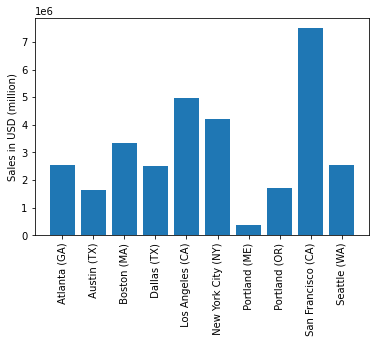

In [195]:
cities = [city for city, df in all_data.groupby('City&State')]
plt.bar(cities, result_Q2['Sales'])
plt.ylabel('Sales in USD (million)')
plt.xticks(cities, rotation='vertical');

In [196]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City&State
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland (OR)
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin (TX)


***Q3 Which time should we display advertisements to maximize liklehood of customers buying product?***

In [197]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) # Be patient as this block needs a few seconds more for execution

In [198]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City&State
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland (OR)
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin (TX)


In [199]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [200]:
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City&State,Hour,Minute
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin (TX),11,59


Text(0, 0.5, 'Number of Orders')

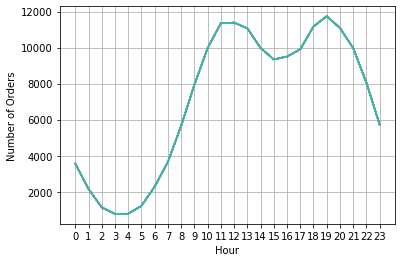

In [201]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby('Hour').count());
plt.xticks(hours);
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

#My recommendation is around 11am or 7pm

***Q4 Which products are most often sold together?***

In [202]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City&State,Hour,Minute
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin (TX),11,59


In [203]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep = False)]
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-203-f36a9505509c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [204]:
df = df[['Order ID', 'Grouped']].drop_duplicates()

In [205]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations 
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable'), 896),
 (('iPhone', 'Lightning Charging Cable'), 893),
 (('iPhone', 'Wired Headphones'), 402),
 (('Google Phone', 'Wired Headphones'), 376),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 333),
 (('iPhone', 'Apple Airpods Headphones'), 330),
 (('Google Phone', 'Bose SoundSport Headphones'), 201),
 (('USB-C Charging Cable', 'Wired Headphones'), 144),
 (('Vareebadd Phone', 'Wired Headphones'), 131),
 (('Lightning Charging Cable', 'Wired Headphones'), 83)]

***Q5 What product sold the most? Why do you think it did?***


Text(0.5, 0, 'Products')

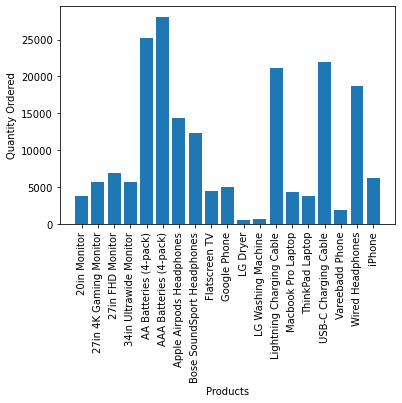

In [206]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical');
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')


<ipython-input-207-888d4c31cca2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8);


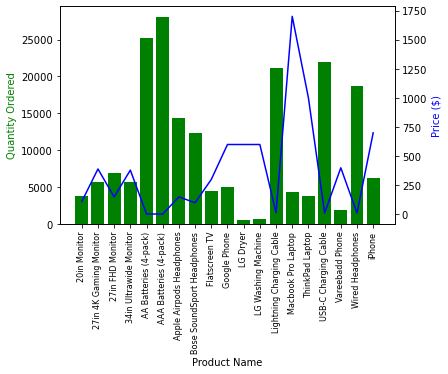

In [207]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
Prices = product_group.mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, Prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8);
